### In this notebook I will:
- Explore basic information about the dataset
- Visualize a heatmap of top feature correlations
- Plot the distributions of numeric and categorical features
- Create some Segmentations

### Load Packages:

In [1]:
# Numpy will be used for Linear Algebra
import numpy as np

# Pandas will be used for DataFrames
import pandas as pd
# Display all Columns 
pd.set_option('display.max_columns', None)

# Matplotlib for Visualization
import matplotlib.pyplot as plt
# Display plots in notebook
%matplotlib inline

# Seaborn for easier Visualization
import seaborn as sns
# Change color scheme
sns.set_style("whitegrid")

# Sys for size of Dataset
import sys

## 1. Load the Data

In [2]:
# Load training set into a pandas DataFrame
train = pd.read_csv('../Datasets/Ames_Training_Set.csv',index_col='Id')

## 2. Inspect the Data
- Size of the data
- Shape of the DataFrame
- View a random sample of the DataFrame
- Print the Data Info
- Print the Categorical Feature Names
- Print the Numerical Feature Names
- Print Sum of Null Values
- Print Number of Unique Values

In [3]:
def get_size(data):
    """This function returns the size of the data"""
    return sys.getsizeof(data)/1000000

In [4]:
def get_shape(data):
    """This function returns the shape of the data"""
    return data.shape

In [5]:
def view_sample(data,n):
    """This function views a random sample of the given 
    DataFrame corresponding to the given n=Number of samples"""
    return data.sample(n)

In [6]:
def get_info(data): 
    """This function returns the data info"""
    return data.info()

In [7]:
def get_cat_names(data):
    """This function loops through categorical names and prints each one"""
    for features in data.dtypes[data.dtypes == 'object'].index:
        print(features) 

In [8]:
def get_num_names(data):
    """This function loops through numerical names and prints each one"""
    for features in data.dtypes[data.dtypes != 'object'].index:
        print(features) 

In [9]:
def view_nulls_sum(data):
    """This function prints out the nulls sum in descending order"""
    return data.isnull().sum().sort_values(ascending = False)

In [10]:
def view_num_unique(data):
    """This Function prints out the number of unique values each feature has in descending order"""
    return data.nunique().sort_values(ascending = False)

In [11]:
def print_list_unique_values(data):
    """This function prints the unique values of each column as a list """
    values_unique = data.columns.values.tolist()
    for column_name in values_unique:
        print(column_name + ": " + str(pd.unique(data[column_name])))

In [12]:
# Print the size and shape of DataFrames
print("The size of our training set is:",round(get_size(train),2),"MB")
print()
print("The shape of our training set is:",get_shape(train),"Meaning it has",train.shape[0],"rows and",train.shape[1],"columns")

The size of our training set is: 5.76 MB

The shape of our training set is: (2051, 81) Meaning it has 2051 rows and 81 columns


In [13]:
# View training DataFrame
view_sample(train,3)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2599,535377070,30,RL,60.0,10914,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1Story,3,3,1929,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Mn,Unf,0.0,Unf,0.0,715.0,715.0,GasA,Fa,N,FuseP,715,0,0,715,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1967.0,Unf,2.0,660.0,Fa,TA,N,0,0,75,0,112,0,NaN,NaN,NaN,0,8,2006,WD,Normal,68000
336,923276030,20,RL,76.0,12887,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1984,1984,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Mn,Rec,207.0,GLQ,590.0,36.0,833.0,GasA,TA,Y,SBrkr,833,0,0,833,1.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Unf,2.0,495.0,TA,TA,Y,431,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,149900
470,528228295,120,RL,51.0,3635,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,130.0,Gd,TA,PConc,Gd,TA,No,ALQ,988.0,Unf,0.0,398.0,1386.0,GasA,Ex,Y,SBrkr,1569,0,0,1569,0.0,1.0,2,0,1,1,Gd,7,Typ,1,TA,Attchd,2007.0,RFn,3.0,660.0,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,175900


In [14]:
# Print the training set info
get_info(train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 81 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [15]:
# Print Categorical Names
print("Categorical Names:\n")
get_cat_names(train)

Categorical Names:

MS Zoning
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Type
Exter Qual
Exter Cond
Foundation
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin Type 2
Heating
Heating QC
Central Air
Electrical
Kitchen Qual
Functional
Fireplace Qu
Garage Type
Garage Finish
Garage Qual
Garage Cond
Paved Drive
Pool QC
Fence
Misc Feature
Sale Type
Sale Condition


In [16]:
# Print Numerical Names
print("Numerical Names:\n")
get_num_names(train)

Numerical Names:

PID
MS SubClass
Lot Frontage
Lot Area
Overall Qual
Overall Cond
Year Built
Year Remod/Add
Mas Vnr Area
BsmtFin SF 1
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Bsmt Full Bath
Bsmt Half Bath
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
TotRms AbvGrd
Fireplaces
Garage Yr Blt
Garage Cars
Garage Area
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Misc Val
Mo Sold
Yr Sold
SalePrice


In [17]:
# View sum of null values
print("Sum of null values:\n")
view_nulls_sum(train)

Sum of null values:



Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Cond         114
Garage Qual         114
Garage Yr Blt       114
Garage Finish       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
Bsmt Qual            55
Bsmt Cond            55
BsmtFin Type 1       55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Full Bath        2
Bsmt Half Bath        2
Garage Cars           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Garage Area           1
Bsmt Unf SF           1
Total Bsmt SF         1
Exter Qual            0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
                   ... 
Heating QC            0
Foundation            0
Functional            0
Sale Type             0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch  

In [18]:
# View number of unique values for each feature
print("Number of unique values:\n")
view_num_unique(train)

Number of unique values:



PID                2051
Lot Area           1476
Gr Liv Area        1053
Bsmt Unf SF         967
1st Flr SF          915
Total Bsmt SF       892
SalePrice           828
BsmtFin SF 1        821
Garage Area         514
2nd Flr SF          504
Mas Vnr Area        373
Wood Deck SF        322
Open Porch SF       223
BsmtFin SF 2        205
Enclosed Porch      159
Lot Frontage        118
Year Built          113
Garage Yr Blt       100
Screen Porch        100
Year Remod/Add       61
Low Qual Fin SF      31
Neighborhood         28
Misc Val             28
3Ssn Porch           22
MS SubClass          16
Exterior 2nd         15
Exterior 1st         15
TotRms AbvGrd        14
Mo Sold              12
Pool Area            10
                   ... 
Bsmt Qual             5
Bsmt Cond             5
Garage Cond           5
Garage Qual           5
Yr Sold               5
Heating               5
Fireplace Qu          5
Electrical            5
Misc Feature          5
Fireplaces            5
Full Bath       

In [19]:
# Print the unique values of each column
print_list_unique_values(train)

PID: [533352170 531379050 535304180 ... 909253010 535179160 527162130]
MS SubClass: [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
MS Zoning: ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Lot Frontage: [ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]
Lot Area: [13517 11492  7922 ... 12444 11449  7558]
Street: ['Pave' 'Grvl']
Alley: [nan 'Pave' 'Grvl']
Lot Shape: ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour: ['Lvl' 'HLS' '

Bsmt Unf SF: [ 192.  276.  326.  384.  676.  557.    0.  188.  632.  390.   96.  815.
  147. 1327. 1430.  624.  470.  660.  732.  402.  343. 1209.  233.  141.
  224.  336.  957.  672. 1420.  792.  507.  417.  160.   36. 1139.  570.
  136.  690. 1050.  134.  398.  156.  776.  412.  764.  403.  500.  133.
  370.  216.  292.  190.  450.  778.  628. 1120.  328.  576.  727.  914.
  285.  976. 1802. 1346.  162. 1140.  970. 1616.  768.  872.  520.  662.
  936.  448.  312.  876.  325. 1251.  551.  588.  320.  599.   98.  122.
  138. 1081.  550.  250.  408.  547.  180.  245.  114.  191.   32.  595.
  269.  978. 1078. 1116.  308. 1290.  587.  107.  706.  565.  161. 1008.
  584.  707.  637.  113.  367.  677.  466.  100.  396.   25.  780. 1530.
 1528.  744.  381.  218.  610.  459.  606.  144.  888.  220. 1752.  522.
 1191.  171.  710.  816. 1040.  108.  175.  572.  544.  324. 1218.  342.
  567. 1313.  252.  327. 1121.  268.  334. 1257.  983.  556.  479. 1234.
 1090.  748. 1450.  832.  728. 2336.  

  766.  689.  209. 1110. 1008. 1069.  865.  601.  876.  667.  217.]
Garage Qual: ['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
Garage Cond: ['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
Paved Drive: ['Y' 'N' 'P']
Wood Deck SF: [   0  100  335  105  169  138  212  243  483  264  416  474  208  104
  256  736  216  303  431  200  379  168  132  496  280  158  142   49
  418  228  261  312  225  140  227  203  307  214  125  153   88  230
   50  276  144  421  187  122   52  156  204  344  240  160  193  114
  275   12  120  328  108  182   28  178   60  250   38  324  646  176
  248  112  306  143  302  257  146  409  224  232  192  136  441   48
  180  221  263   81  134  164  268  194  191   32  161   96  210  173
   90  106  172  393   63  196  246  288  385  237  205  188  242   30
   54  439  209   22  236  282   24   86  300  384  148  147  365  238
  201  370  327  521  184  298  315  371  128  211  218  270  390  133
  135  206  342  262  329   94  319  126  530  190   45   66  354  289
  382   84  198  394  

## 2. Correlations

In [20]:
def corr_heatmap(data):
    """This function shows a heatmap of Numerical features"""
    f,ax = plt.subplots(figsize =(24,24))  # Make figure size 24 x 24  
    correlation_matrix = train.corr() * 100  # Compute Correlation Matrix 
    cmap = sns.diverging_palette(220, 10, as_cmap=True) # Generate custom diverging colormap
    mask = np.zeros_like(correlation_matrix,dtype=np.bool) # Generate a mask for upper triangle
    mask[np.triu_indices_from(mask)] = True # Continue mask for upper triangle
    sns.heatmap(correlation_matrix,vmax = .8,center=0, square = True,cmap = cmap,
                annot = True,fmt='.0f',mask=mask, linewidths=.8,cbar_kws={"shrink":.5})  # Create the Heatmap 
    ax.set_title('Heatmap of Numerical Features\n',fontsize= 30); # Name the Heatmap

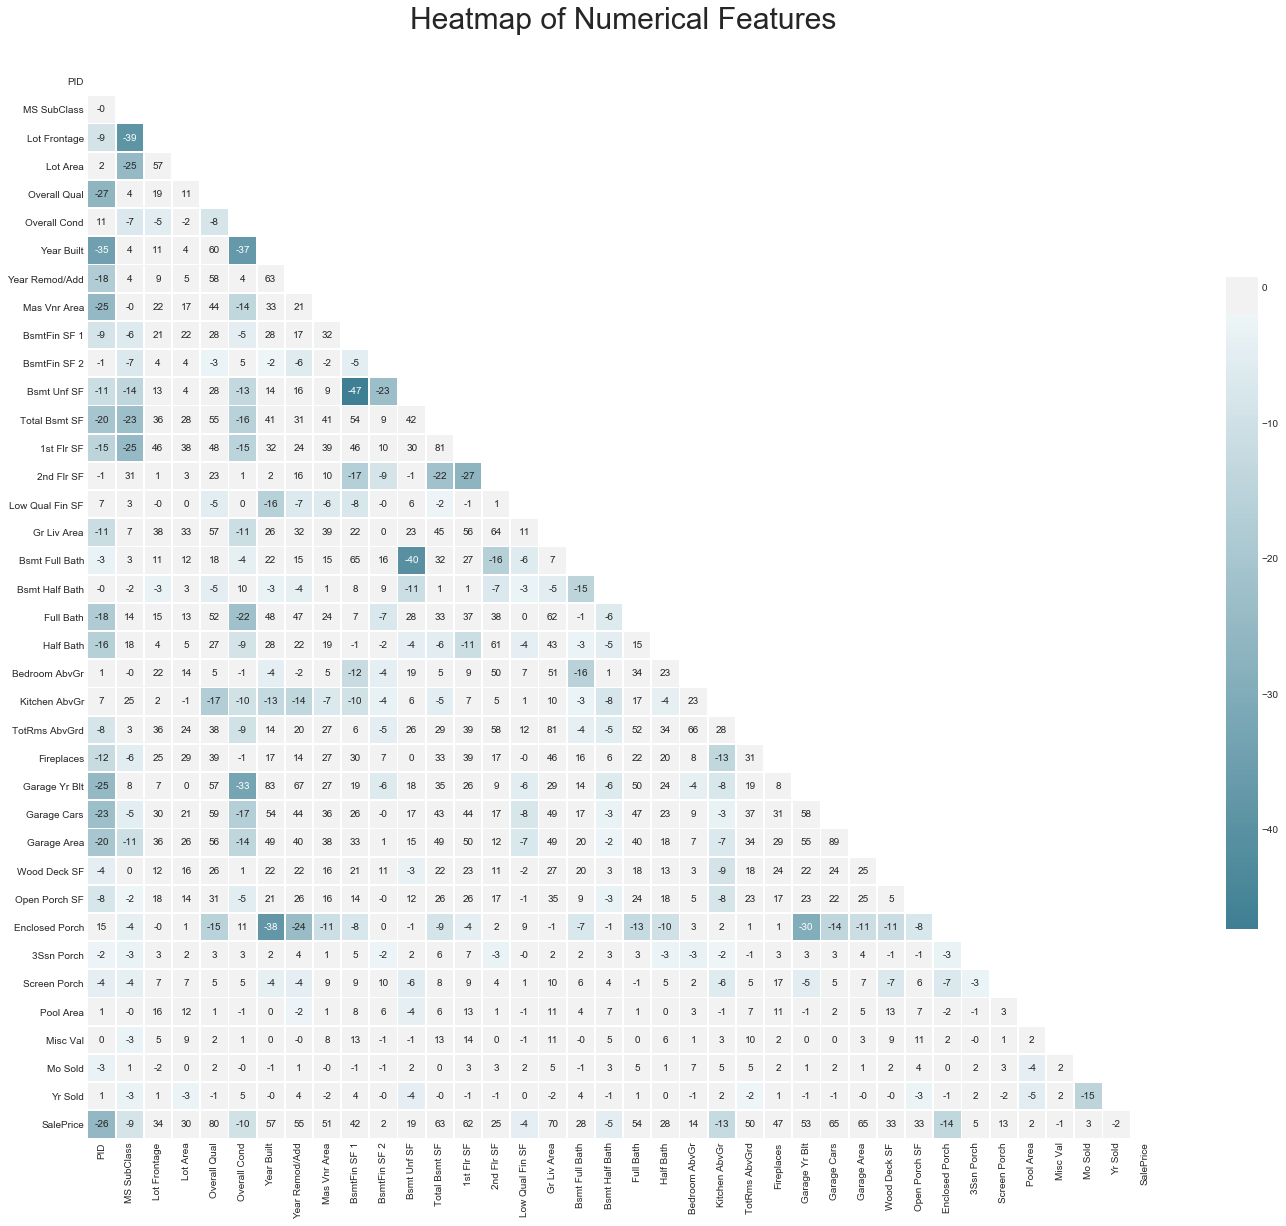

In [21]:
# Show Heatmap of all numerical Features
corr_heatmap(train)
# Save the image 
plt.savefig("../Images/Heatmap_of_all_Numerical_Features.jpg",bbox_inches='tight',pad_inches=.5);

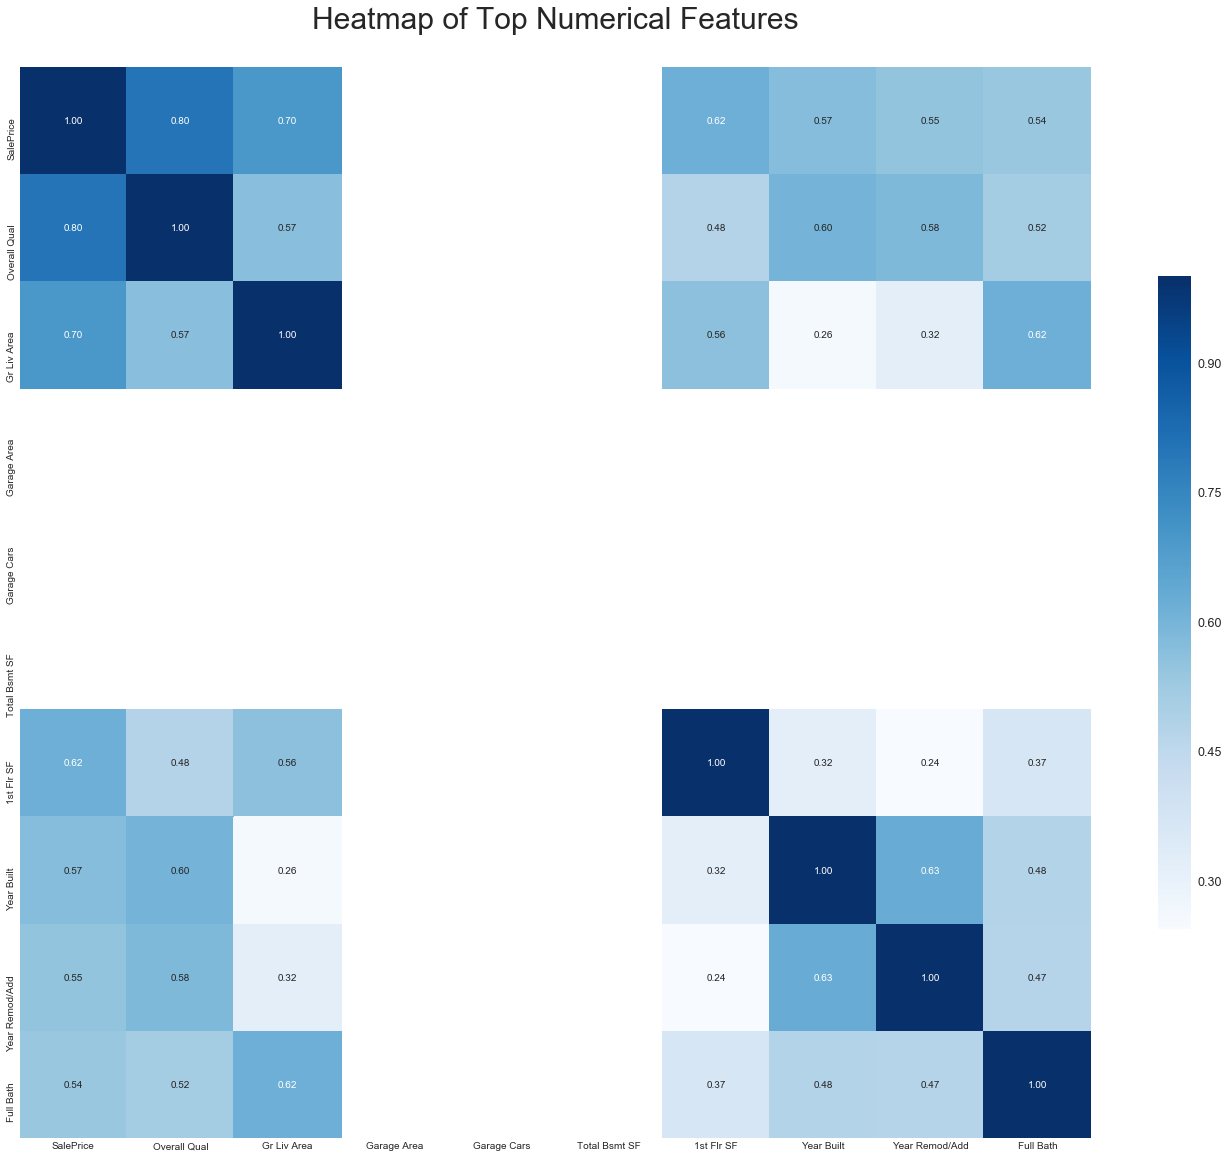

In [22]:
# Top 10 correlations 
f,ax = plt.subplots(figsize =(24,24))  # Make figure size 24 x 24  
correlations = train.corr()  # Compute correlation matrix
k= 10 # Top 10
cols = correlations.nlargest(k,'SalePrice')['SalePrice'].index  # Top ten based on columns
cm = np.corrcoef(train[cols].values.T)  # Transpose of values
sns.set(font_scale = 1.25)  # Font Scale
hm = sns.heatmap(cm,cmap='Blues',square = True,cbar=True,annot = True,fmt='.2f',cbar_kws={"shrink":.5},
            annot_kws={'size': 10},yticklabels=cols.values,xticklabels=cols.values); # Generate the Heatmap
ax.set_title('Heatmap of Top Numerical Features\n',fontsize= 30); # Name the Heatmap
# Save the image 
plt.savefig("../Images/Heatmap_of_Top_Numerical_Features.jpg",bbox_inches='tight',pad_inches=.5);

## 3. Distribution of Numeric Features

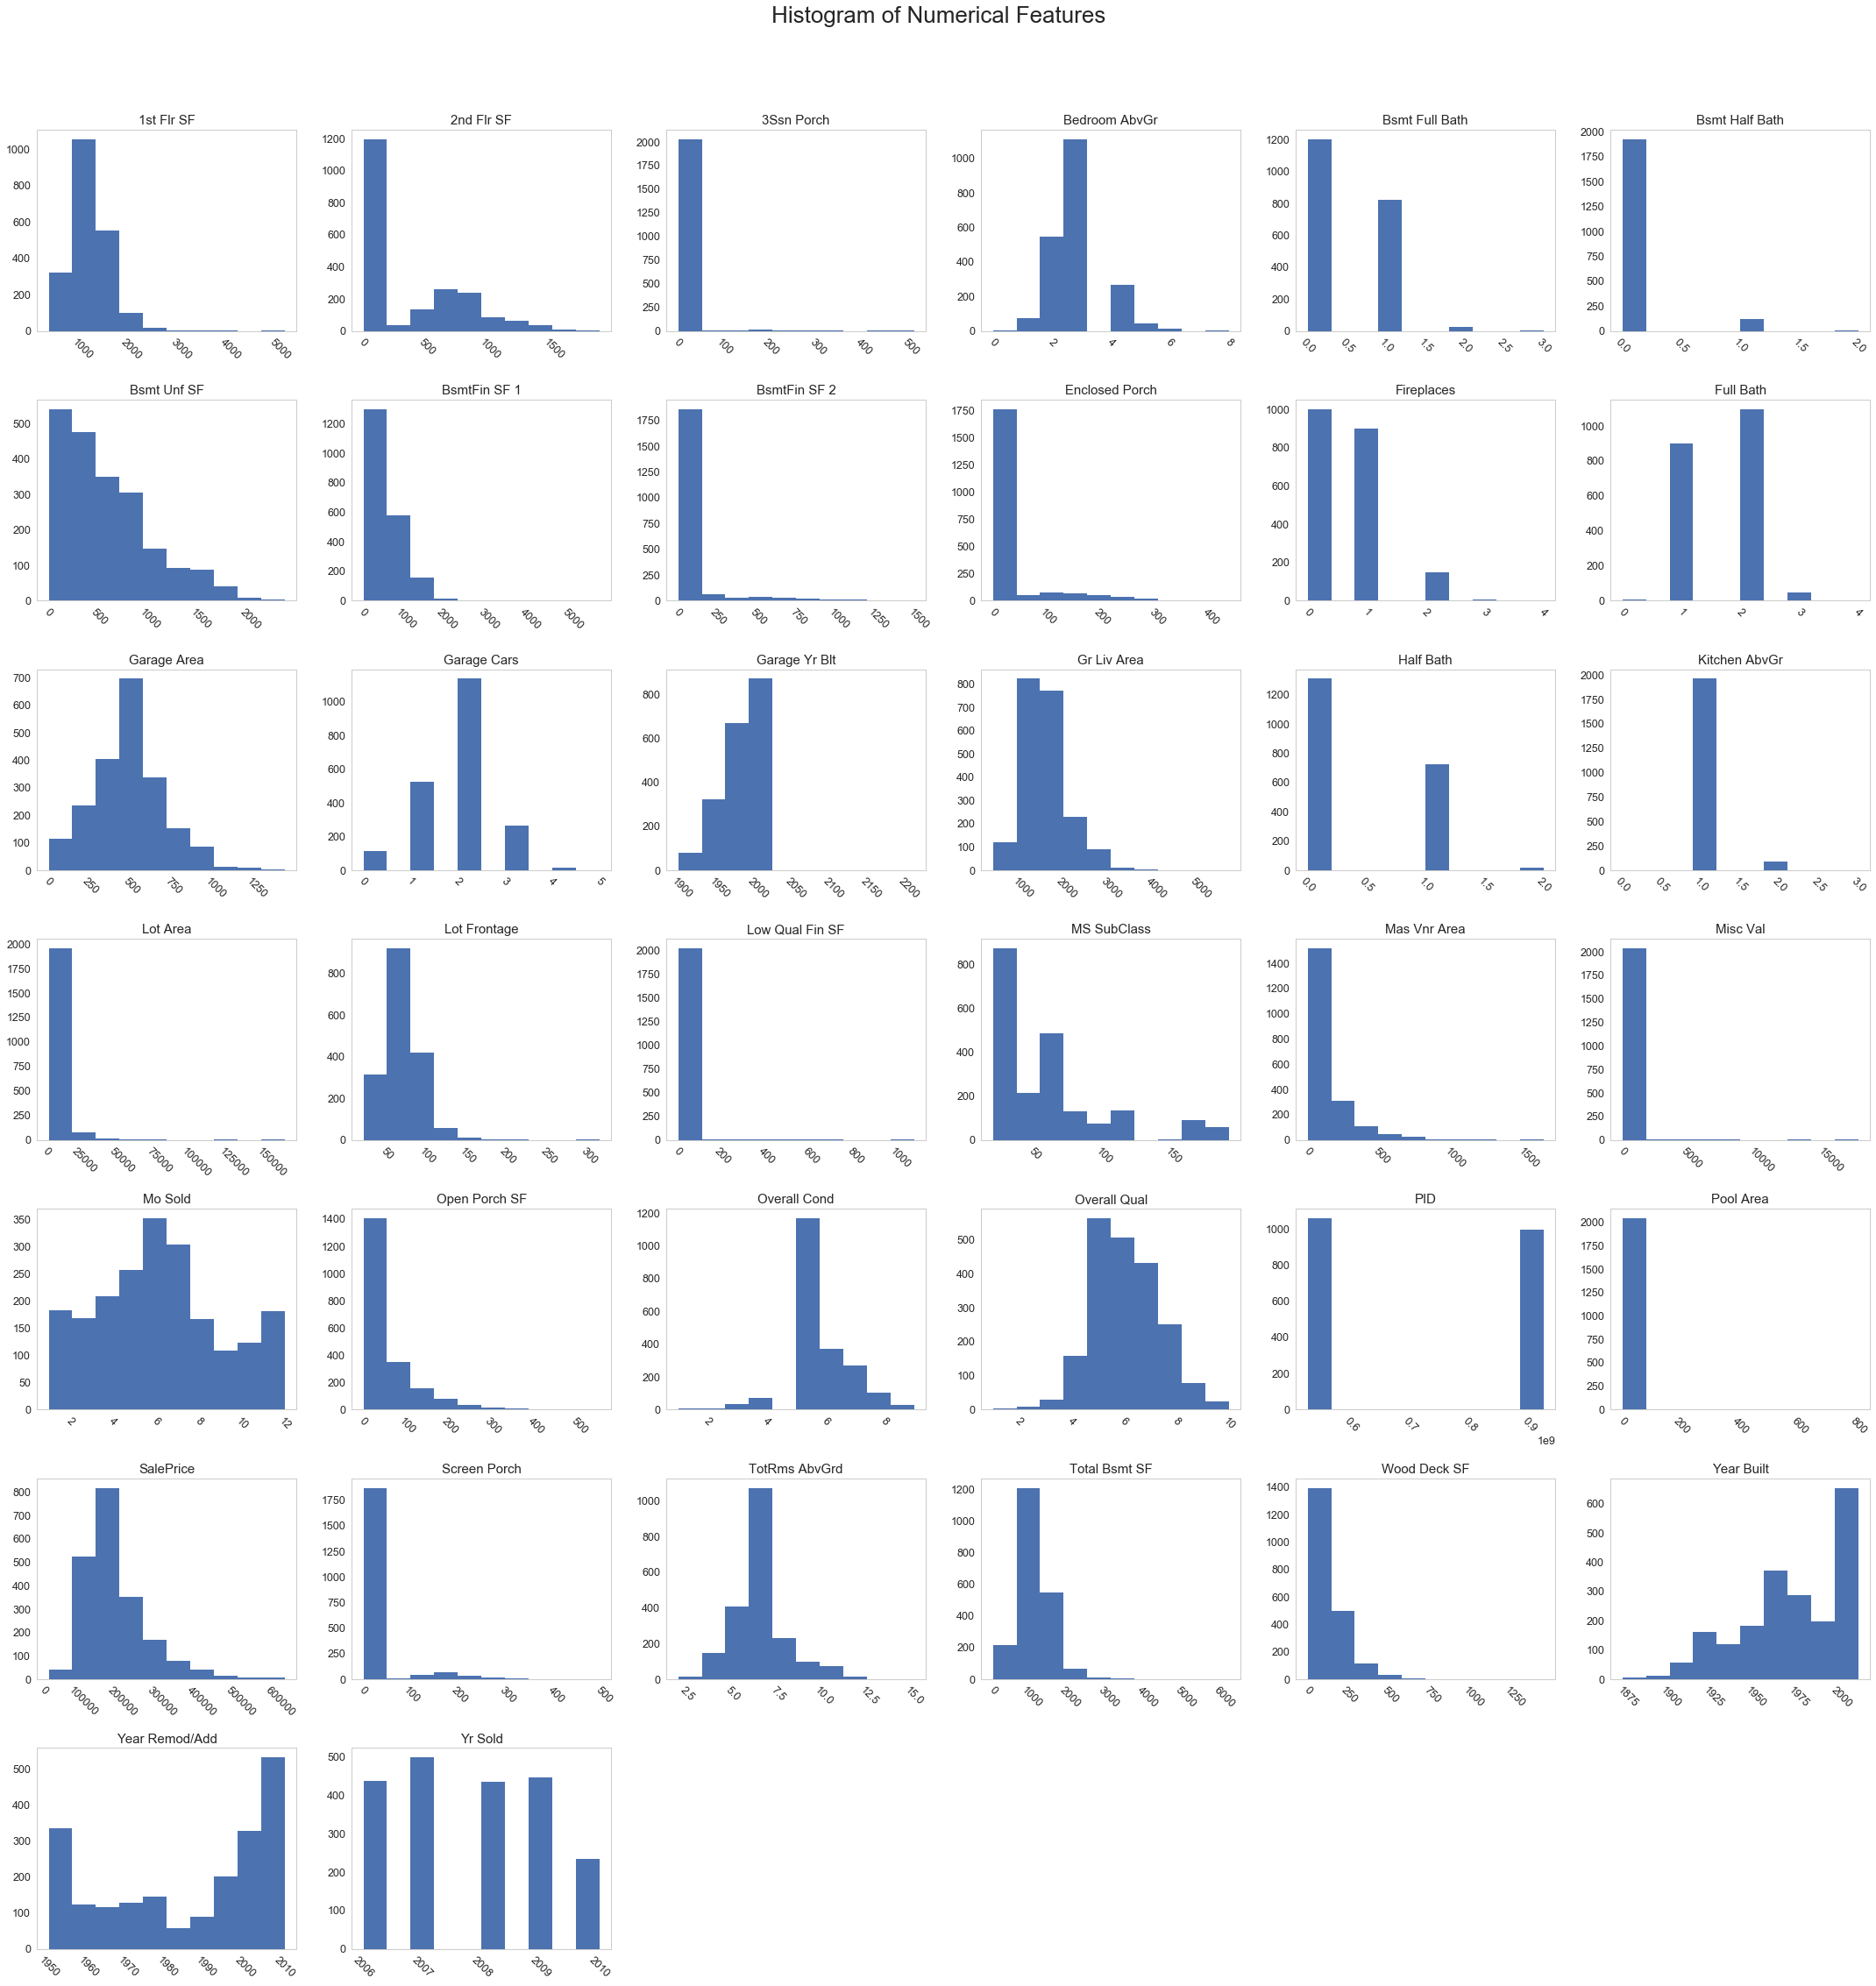

In [23]:
sns.set_style("whitegrid")
# Plot histogram grid
train.hist(xrot=-45, figsize=(30,30),grid = False);
# Adjust subplot params
plt.tight_layout()
# Set title 
plt.suptitle('Histogram of Numerical Features', x=0.5, y=1.05, ha='center', fontsize='xx-large');
# Save the figure
plt.savefig("../Images/Histogram_of_Numerical_Features.jpg",bbox_inches='tight',pad_inches=.5);

## 4. Distribution of Categorical Features

In [24]:
# select only the Categorical Features
cat_feat = train.select_dtypes(include=['object'])
# Print the number of Categorical Features
print("There are",cat_feat.shape[1],"Categorical Features")

There are 43 Categorical Features


In [25]:
# Diisplay Summary of Categorical Features
cat_feat.describe()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2051,2051,140,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2029,2051,2051,2051,1996,1996,1993,1996,1995,2051,2051,2051,2051,2051,2051,1051,1938,1937,1937,1937,2051,9,400,65,2051,2051
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,6,6,15,15,4,4,5,6,5,5,4,6,6,5,5,2,5,4,8,5,6,3,5,5,3,4,4,5,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1598,2044,85,1295,1843,2049,1503,1953,310,1767,2025,1700,1059,1619,2025,724,721,1218,1247,1778,926,887,1834,1339,615,1749,2018,1065,1910,1868,1047,1915,523,1213,849,1832,1868,1861,4,227,56,1781,1696


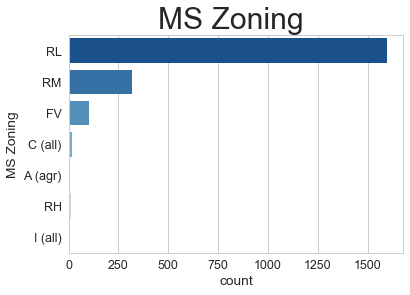

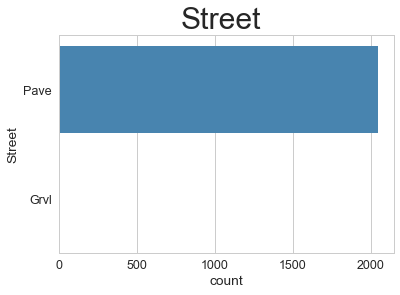

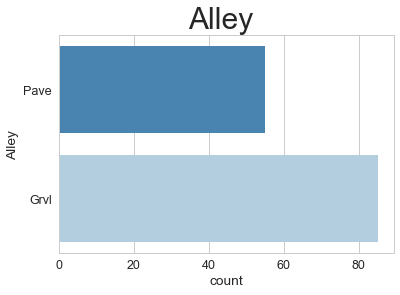

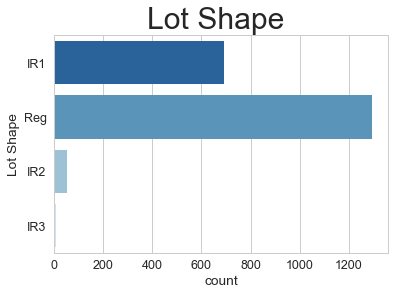

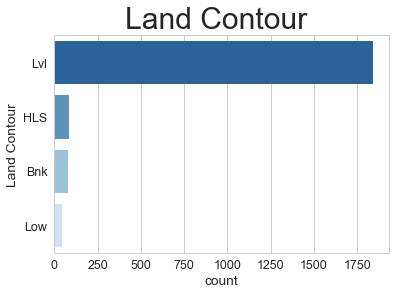

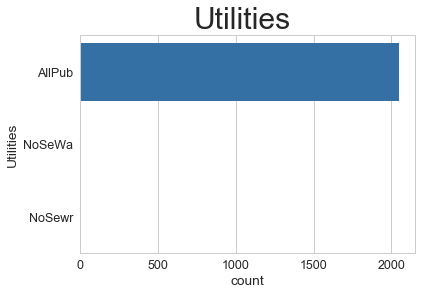

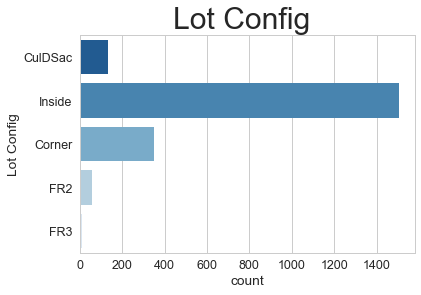

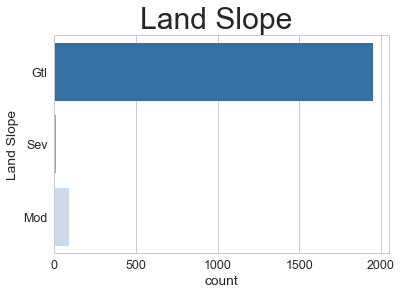

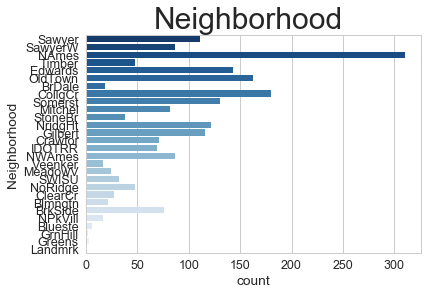

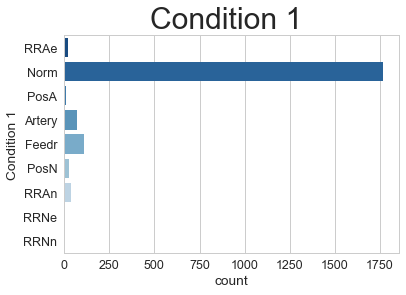

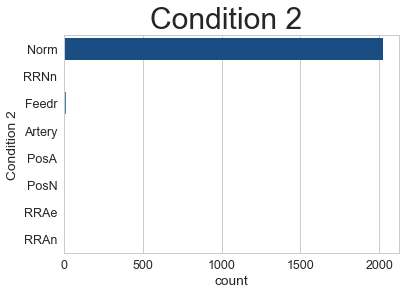

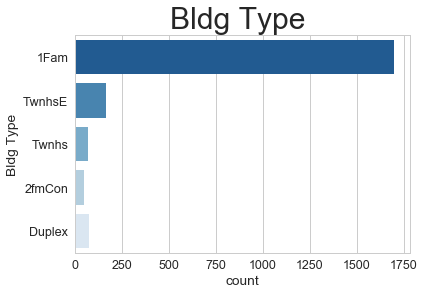

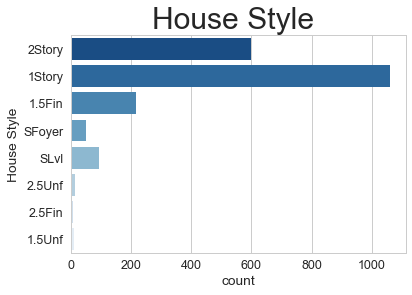

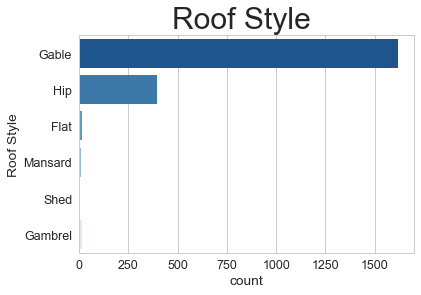

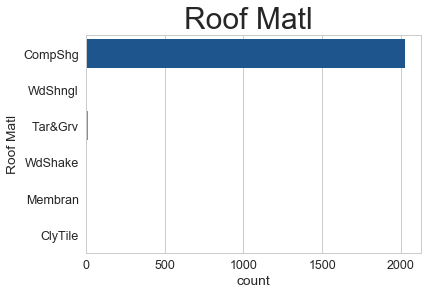

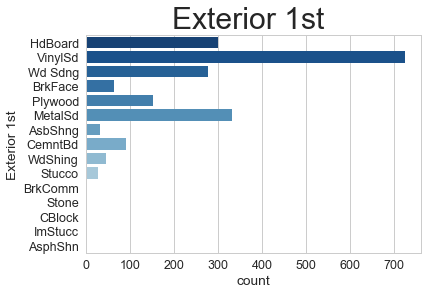

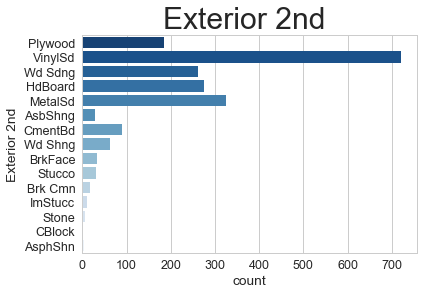

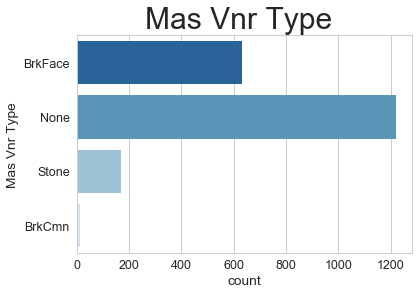

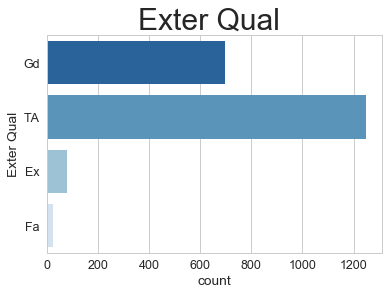

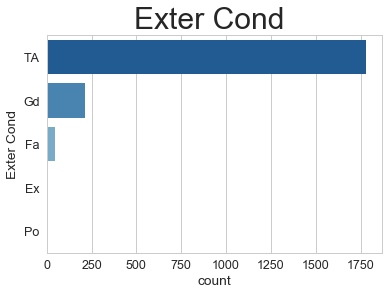

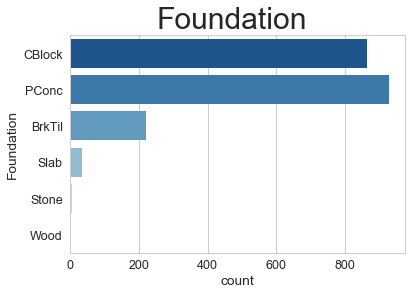

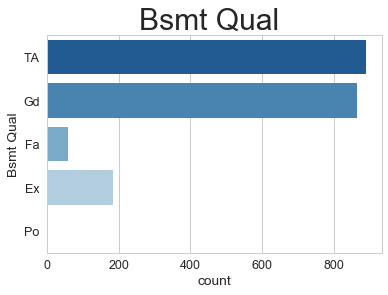

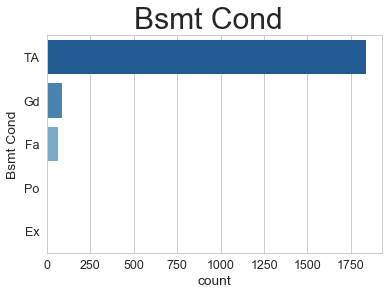

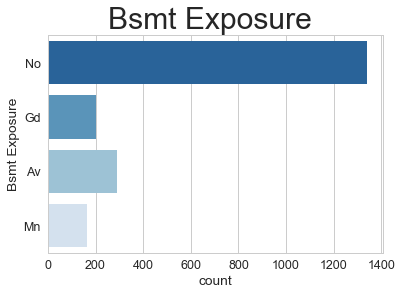

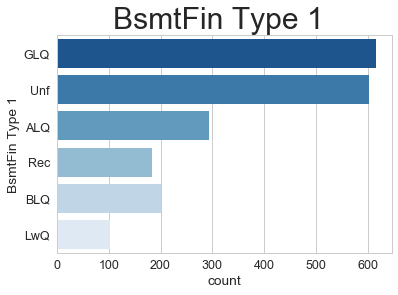

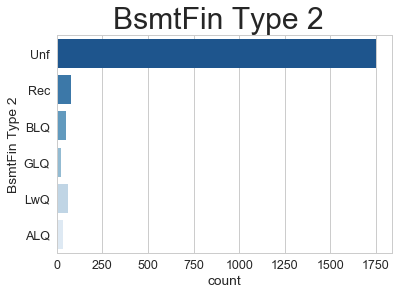

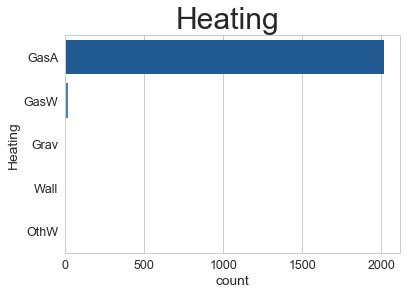

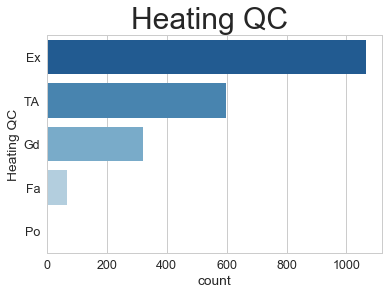

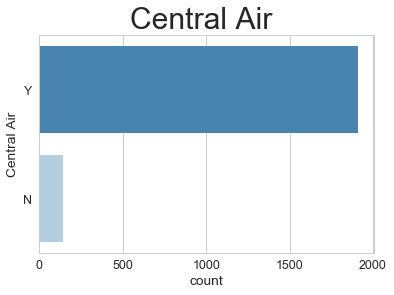

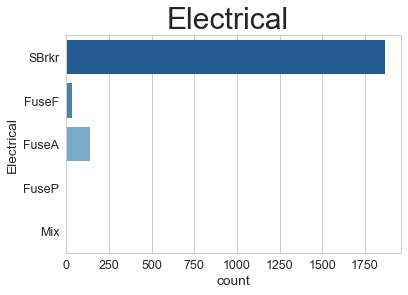

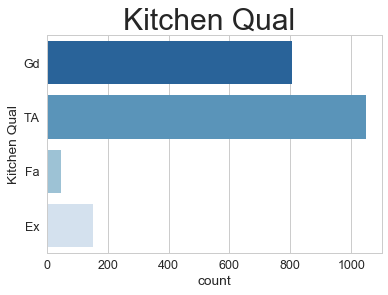

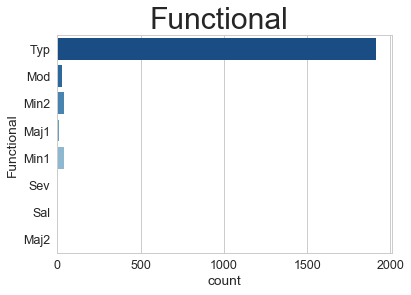

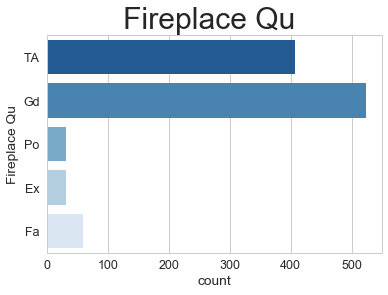

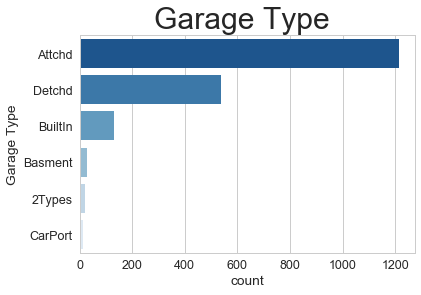

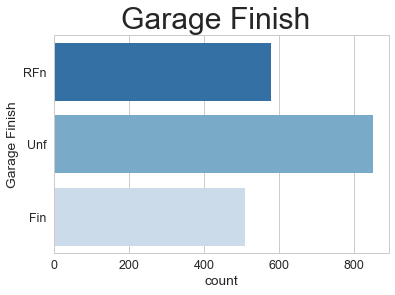

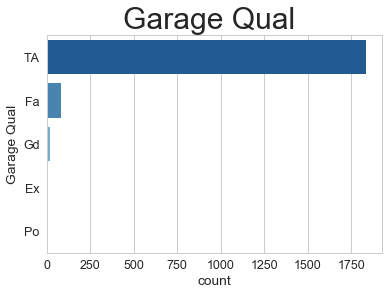

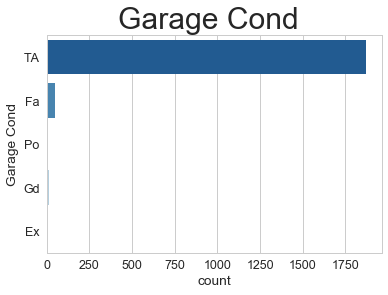

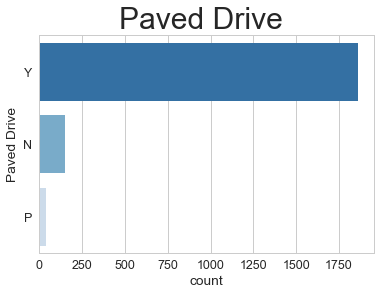

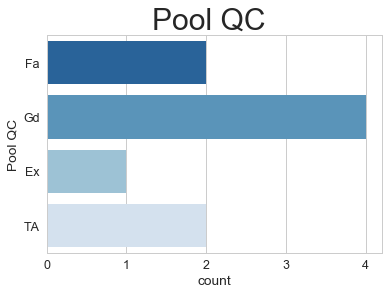

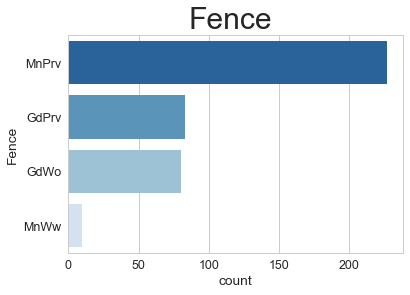

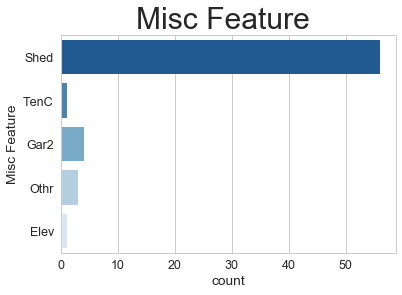

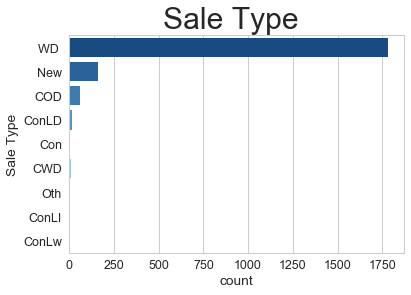

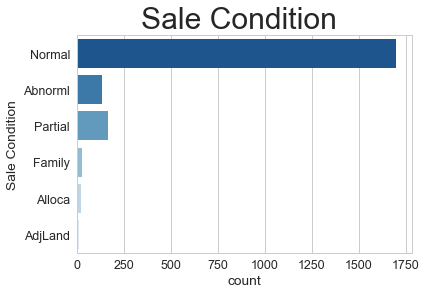

In [26]:
# Plot bar plot for each Categorical Feature
# The for loop will help to handle any number of categrical features
sns.set_style("whitegrid") # Set background white
for features in train.dtypes[train.dtypes == "object"].index: # Create For loop
    img = sns.countplot(y=features,data = train,palette = "Blues_r")  # Countplot
    plt.suptitle(features, x=0.5, y=.98,ha='center', fontsize=30); # Title of count plots
    fig = img.get_figure() # Grab each figure
    fig.savefig("../Images/Categorical_Count_Plots/%s.jpg"%str(features)) # Save each figure 
    plt.show()


## 5. Plotting against Target variable SalePrice

#### A. Plot Distribution of Target Variable

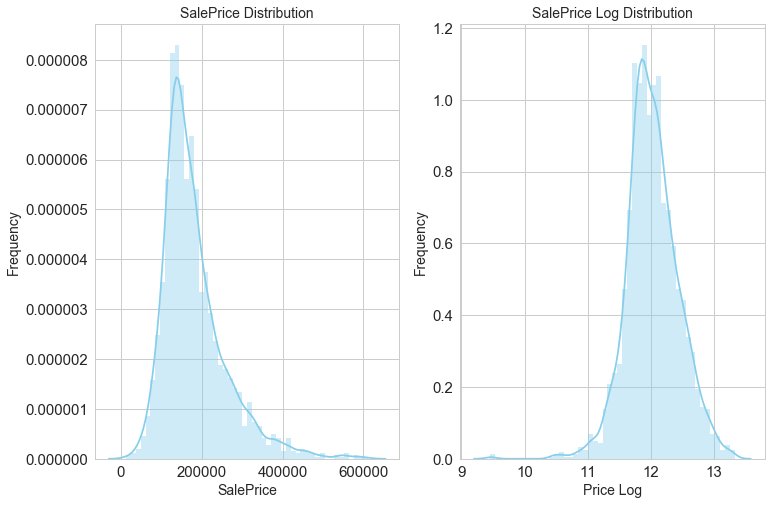

In [27]:
# Create the log transformation of SalePrice
train['log_price']=np.log(train['SalePrice']+1)

plt.figure(figsize=(12, 8))  # Figure size
plt.subplot(1,2,1)  # Subplot in row one column one
sns.distplot(train['SalePrice'], bins=50,hist_kws={'alpha': 0.4},color="skyblue"); # Type of plot
plt.xlabel('SalePrice', fontsize=14) # X-label
plt.ylabel('Frequency', fontsize=14) # Y-label
plt.tick_params(labelsize=15) # Label size
plt.title('SalePrice Distribution', fontsize=14) # Title of first subplot


plt.subplot(1,2,2) # Subplot in row one column two
sns.distplot(train['log_price'], bins=50,hist_kws={'alpha': 0.4},color="skyblue"); # Log distribution
plt.xlabel('Price Log', fontsize=14) # X-label
plt.ylabel('Frequency', fontsize=14) # Y-label
plt.tick_params(labelsize=15) # Label size
plt.title('SalePrice Log Distribution', fontsize=14) # Title of second subplot
plt.savefig("../Images/Original_and_Log_Distribution_of_SalePrice.jpg",bbox_inches='tight',pad_inches=.5); # Save image

plt.show() # Remove text

#### B. Plot Regplots against Target Variable

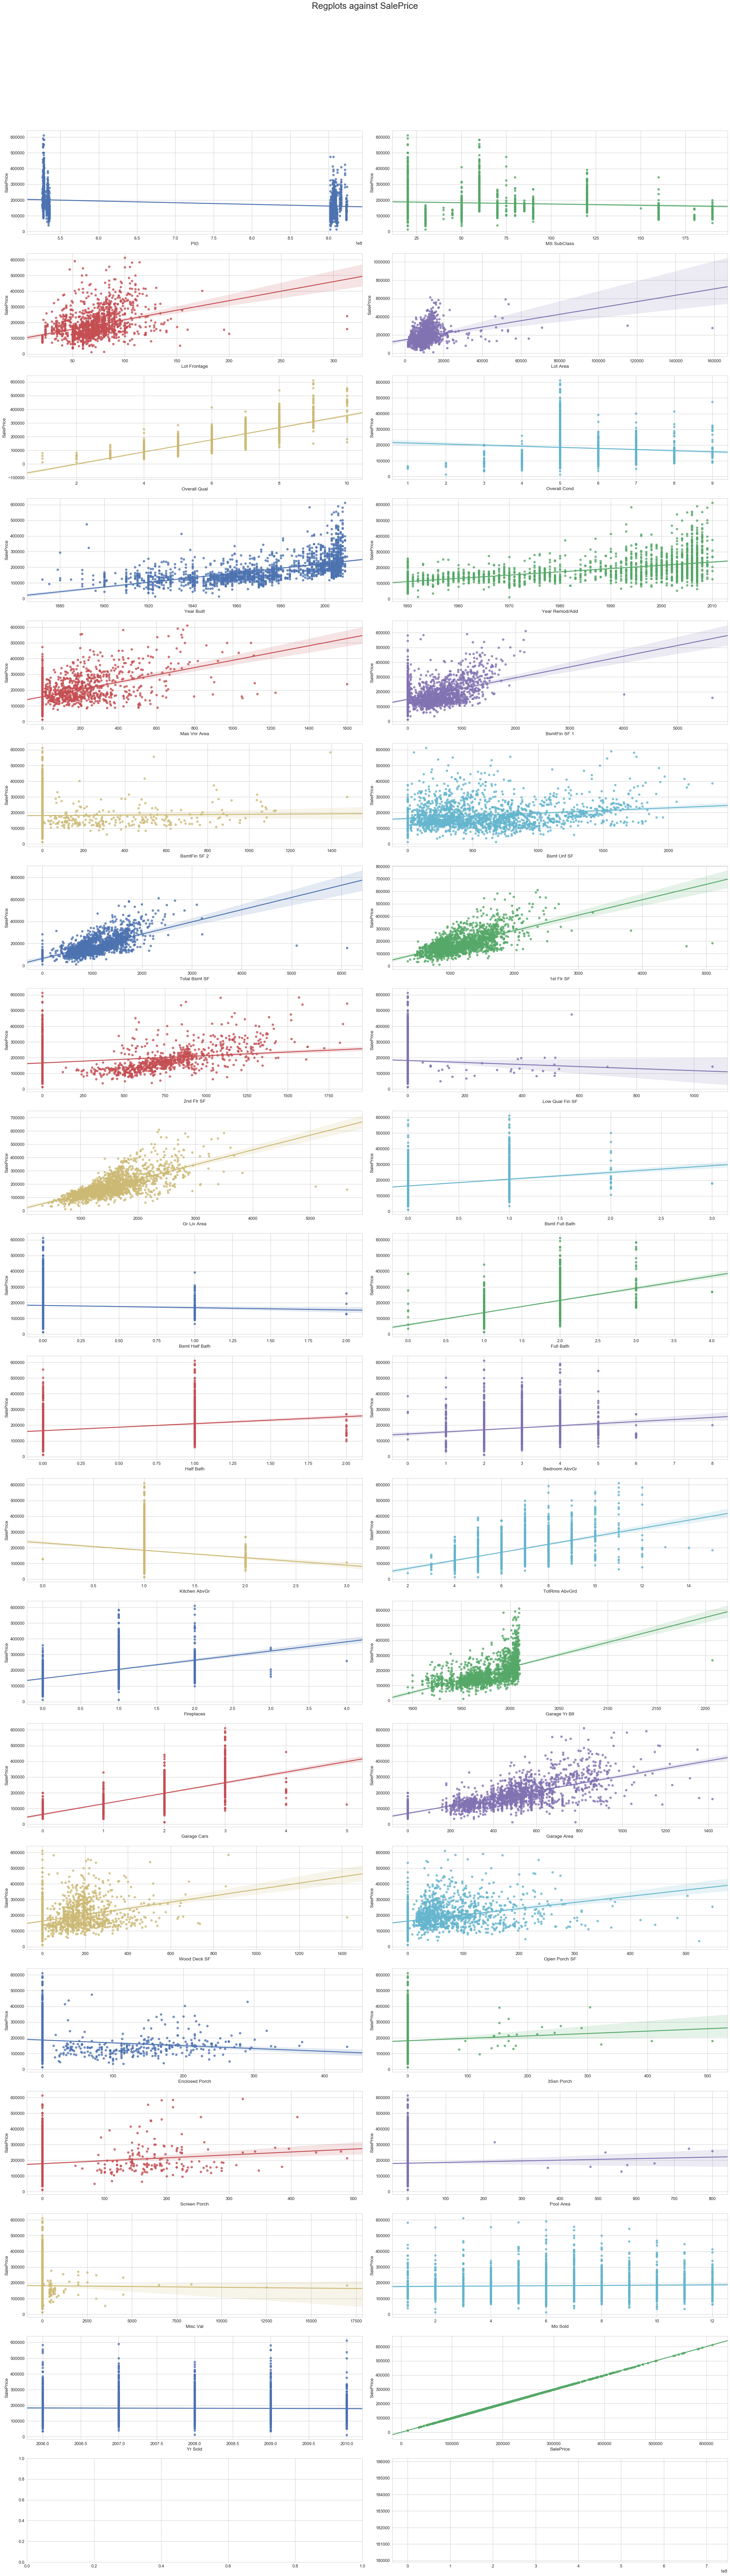

In [28]:
# Create a list of subplot features
subplot_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Set the size and location of subplots
fig, ax = plt.subplots(round(len(subplot_features) / 2), 2, figsize = (30, 100))
# Create a for loop to plot all numeric features
for i, ax in enumerate(fig.axes):
    if i < len(subplot_features) - 1:
        sns.regplot(x=subplot_features[i],y=train['SalePrice'], data=train[subplot_features], ax=ax)        
# Adjust subplot params
plt.tight_layout()
# Set title 
plt.suptitle('Regplots against SalePrice', x=0.5, y=1.05, ha='center', fontsize='xx-large');
# Save the figure
plt.savefig("../Images/Regplot_against_SalePrice.jpg",bbox_inches='tight',pad_inches=.5);

#### C. Boxplot Year Built against SalePrice

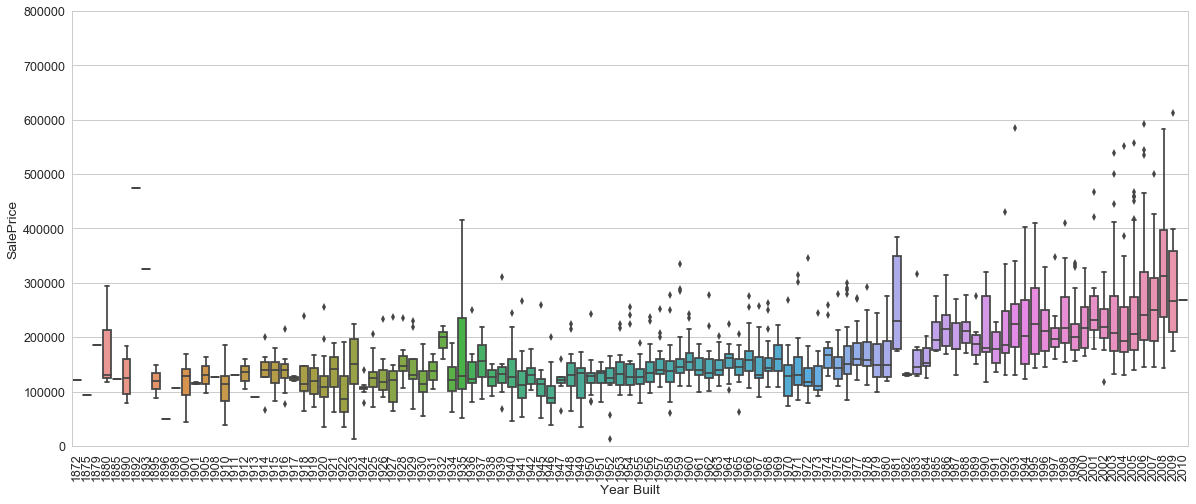

In [29]:
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x="Year Built", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);